# 기존 가설 1. 전문가의 특성이 고객 만족도에 영향을 미칠 것이다.

In [3]:
import pandas as pd
M = pd.read_csv('Merge_2.csv')

In [5]:
df = M[['수수료율','서비스명','서비스가격','평점','대분류']]

In [7]:
df.nunique()

수수료율        3
서비스명     2786
서비스가격     187
평점         21
대분류        12
dtype: int64

In [9]:
df.duplicated().sum() # 중복된 행 갯수 출력

328713

In [11]:
df = df.drop_duplicates() # 중복된 행 제거

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7069 entries, 0 to 335781
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   수수료율    7069 non-null   float64
 1   서비스명    7069 non-null   object 
 2   서비스가격   7069 non-null   float64
 3   평점      7069 non-null   float64
 4   대분류     7069 non-null   object 
dtypes: float64(3), object(2)
memory usage: 331.4+ KB


In [15]:
df1 = df.loc[df.평점!=0]

폰트 설정

In [18]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

서비스가격과 평점의 관계

서비스가격과 평점의 상관계수:
           서비스가격        평점
서비스가격  1.000000  0.006206
평점     0.006206  1.000000


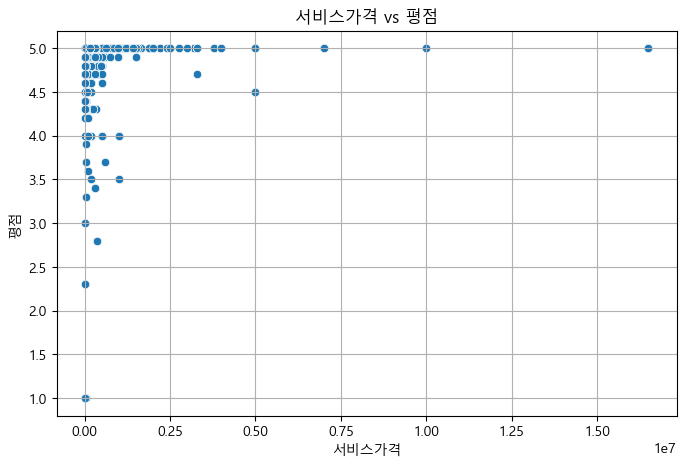

In [20]:
# 상관계수 확인
corr = df1[['서비스가격', '평점']].corr()
print("서비스가격과 평점의 상관계수:\n", corr)

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df1, x='서비스가격', y='평점')
plt.title('서비스가격 vs 평점')
plt.grid(True)
plt.show()

대분류와 평점의 관계

대분류
UnReal    5.000000
인공지능      4.990000
게임        4.983333
데이터       4.967403
모바일       4.965929
홈페이지      4.963422
기타        4.956242
프로그래밍     4.954273
프로그램      4.949487
커머스       4.949200
디자인       4.934000
기획        4.850000
Name: 평점, dtype: float64


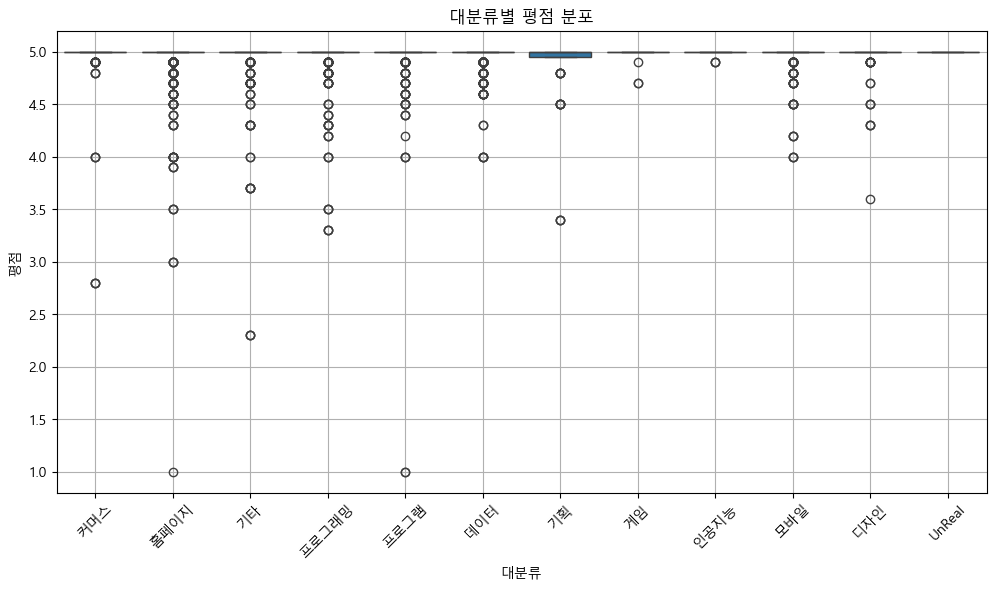

In [23]:
# 대분류별 평점 평균
print(df1.groupby('대분류')['평점'].mean().sort_values(ascending=False))

# 박스플롯으로 시각화
plt.figure(figsize=(12, 6))
sns.boxplot(data=df1, x='대분류', y='평점')
plt.title('대분류별 평점 분포')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [25]:
df1.평점.describe()

count    5792.000000
mean        4.959202
std         0.188006
min         1.000000
25%         5.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: 평점, dtype: float64